## Active Drag Testing
To see if the current active drag algorithm works

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
t = np.array( np.linspace(0,10,101) )
v = np.zeros( 101 )
h = np.zeros( 101 )
D = np.zeros( 101 )
D_flaps = np.zeros( 101 )
min_vel = np.zeros( 101 )

A = 0.008107 # m^2 rocket reference area
A_flaps = 0.00258 * 2 #Area of 2 flap, 0.00258, 0.0113 ideal area
g = 9.8 # m/s^2
init_h_feet = 2324
init_v_feet = 361
init_h = init_h_feet/3.281 # m
init_v = init_v_feet/3.281 # m/s
rho = 1.225 #kg/m^3
mass = 4.02 # kg; 3.9 for the shorter flight
C = 0.57 #approx draf coeff from data
C_flaps = 1.28 #approx drag coeff of flap
ts = 0.1 # s
flaps = 0
des_h = 1053.389 #final height 2345 ft = 714.756m; 3456 ft = 1053.389
buffer = 3 #Buffer percent

h[0] = init_h
v[0] = init_v

for i in range(1,101):
    D[i] = 1/2*rho* (v[i-1])**2 * C * A #drag force
    if h[i-1] > des_h:
        flaps = 1
    else:
        min_vel[i]  = np.sqrt(2*(g+D[i]/mass)*(des_h - h[i-1]))
        if v[i-1] > min_vel[i]*(1 + buffer/100):
            flaps = 1
        else:
            flaps = 0
    
    if flaps == 1:
        D_flaps[i] = 1/2*rho* (v[i-1])**2 * C_flaps * A_flaps #drag force due to flaps
    elif flaps == 0:
        D_flaps[i] = 0
        
    v[i] = v[i-1] + (-g -D[i]/mass - D_flaps[i]/mass)*ts
    
    h[i] = h[i-1] + v[i]*ts
    
print("Apogee:", max(h)*3.281, "feet")

Apogee: 3487.9680638387254 feet


Text(0, 0.5, 'm/s')

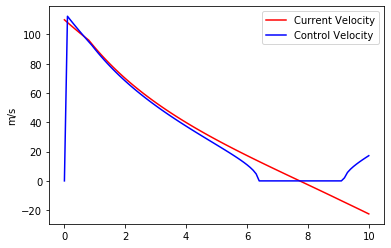

In [185]:
plt.plot( t,v, 'r-')
plt.plot( t,min_vel, 'b-')
plt.legend(('Current Velocity','Control Velocity'))
plt.ylabel('m/s')

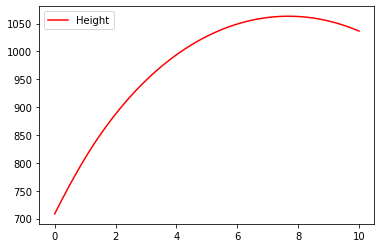

In [186]:
plt.plot( t,h, 'r-')
plt.legend(['Height'])

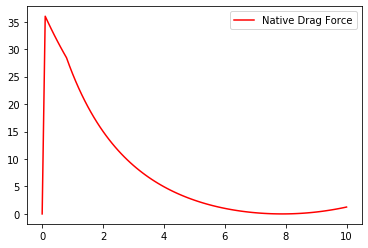

In [179]:
plt.plot( t,D, 'r-')
plt.legend(['Native Drag Force'])

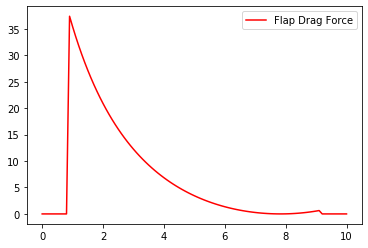

In [187]:
plt.plot( t,D_flaps, 'r-')
plt.legend(['Flap Drag Force'])